# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing Data

In [1]:
import pandas as pd
Census=pd.read_csv("Census.csv",sep=",") #reading Census.csv file
Census.head() #Looking into top 5 rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
Census.shape #Checking the shape of our data

(32559, 15)

# Identifing the type of Problem

In [3]:
Census.dtypes #Checking the datatype of each attribute

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The prediction task is to determine whether a person makes over $50K a year or not.

# Exploratory Data Analysis

## Handling Null Values

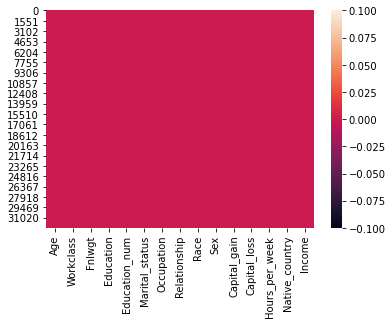

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(Census.isnull()) #Looking for null values if any, in heatmap

In [5]:
Census.isin([' ?']).sum() #Checking for ? values in dataset

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [6]:
#Replacing ? values with Mode of the object columns
for col in ['Workclass', 'Occupation', 'Native_country']:
    Census[col]=Census[col].replace(' ?', Census[col].mode()[0])

In [7]:
int_list=list(Census.select_dtypes(['int64']).columns) #Getting the list of int64 columns in int_list

# Univariate Analysis

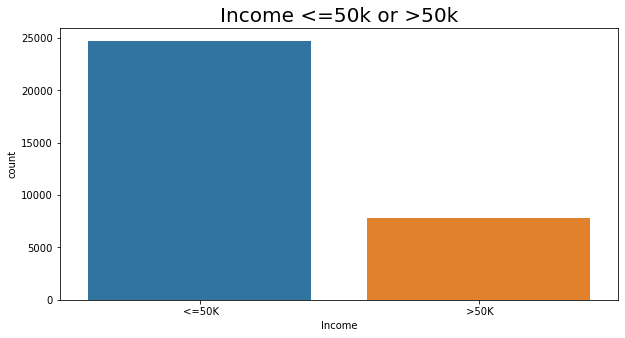

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
sns.countplot(x="Income", data=Census) #Plotting Countplot for Income from Census dataset
plt.title("Income <=50k or >50k", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

People who earned less than or equal to 50k have more number than people who earned more than 50k

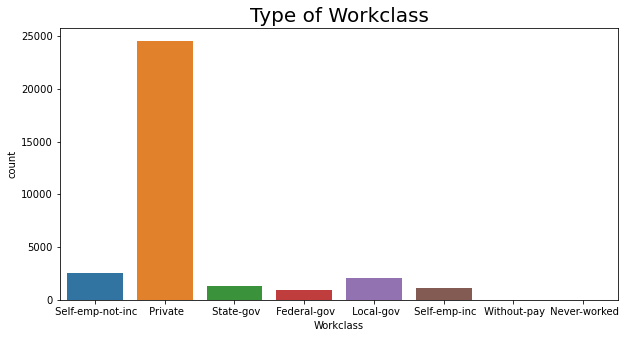

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x="Workclass", data=Census)
plt.title("Type of Workclass", fontsize = 20)
plt.show()

Private Employee participated more 

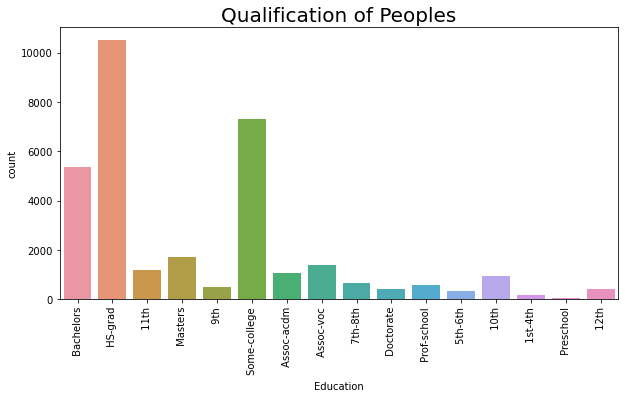

In [10]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Education", data=Census)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Qualification of Peoples", fontsize = 20)
plt.show()

The person who did HS-Grad is earning more than others

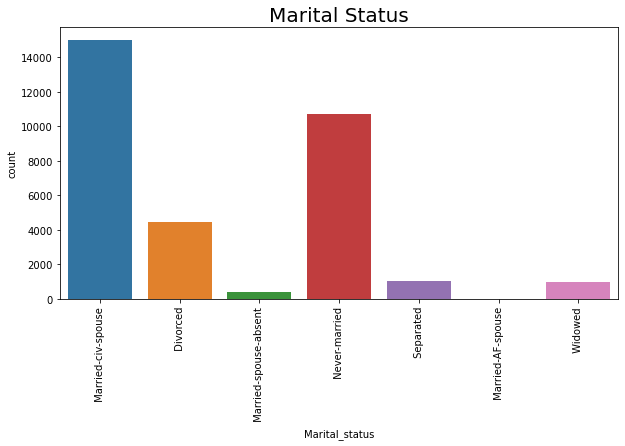

In [11]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Marital_status", data=Census)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Marital Status", fontsize = 20)
plt.show()

Married-civ-spouse have more income than others

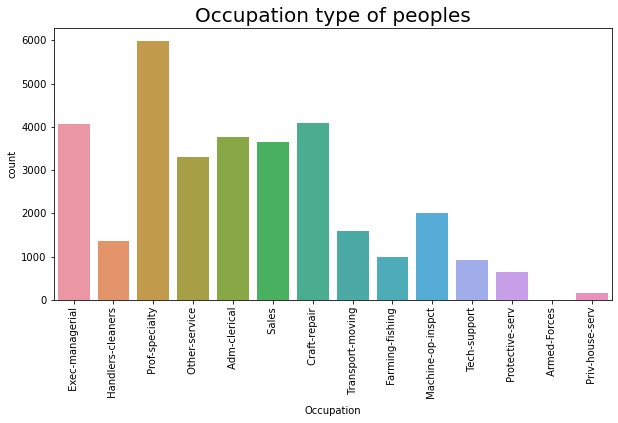

In [12]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Occupation", data=Census)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Occupation type of peoples", fontsize = 20)
plt.show()

People who's occupation is Prof-specialty have more number than others Occupation peoples.

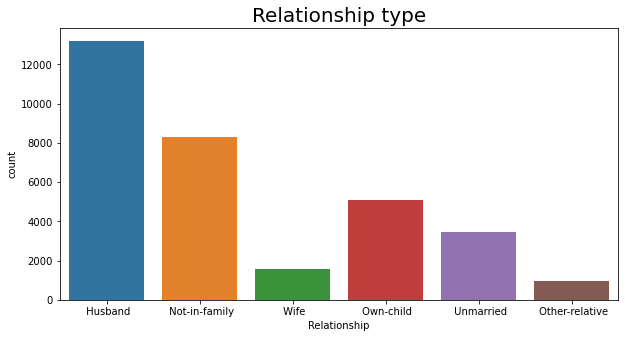

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x="Relationship", data=Census)
plt.title("Relationship type", fontsize = 20)
plt.show()

Husband are earning more than any other person of family

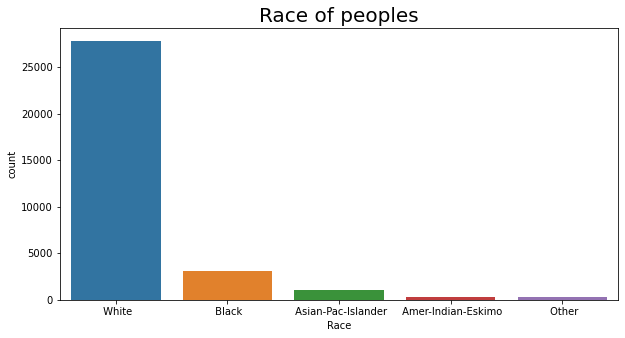

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x="Race", data=Census)
plt.title("Race of peoples", fontsize = 20)
plt.show()

White peoples have more earning than other race of peoples

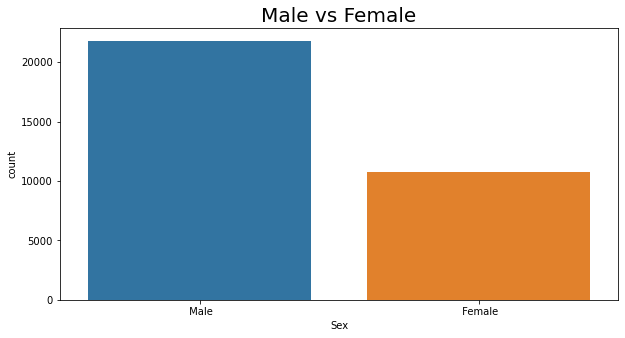

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x="Sex", data=Census)
plt.title("Male vs Female", fontsize = 20)
plt.show()

Male earning more than Female

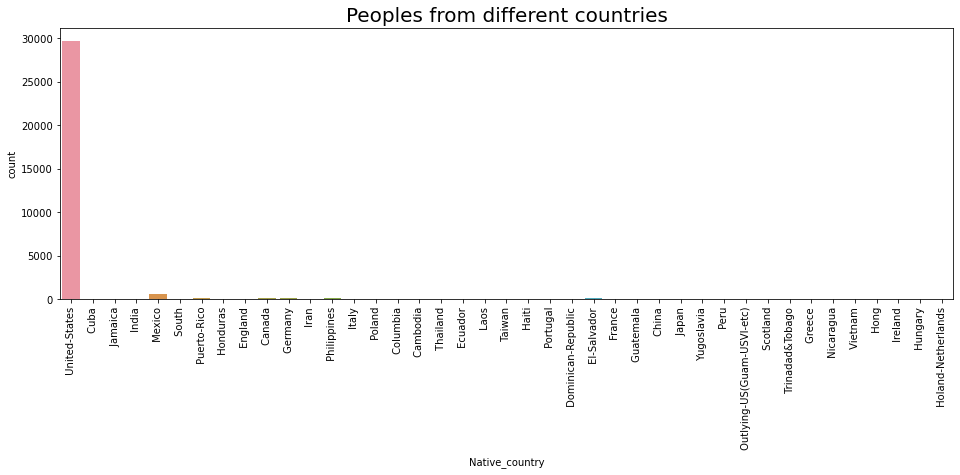

In [16]:
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Native_country", data=Census)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Peoples from different countries", fontsize = 20)
plt.show()

United-States peoples are earning more than other country peoples

# Bi-variate Analysis

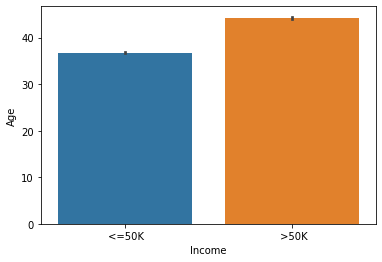

In [17]:
sns.barplot(x = 'Income', y = 'Age', data = Census)

People who have age less than 40 are earning less than 50k and people who have age more than 40 are earning more than 50k

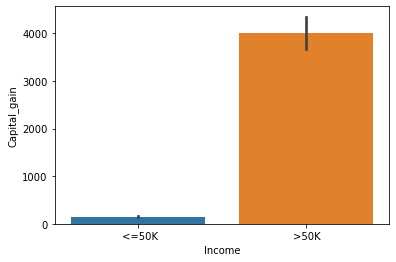

In [18]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = Census)

If Capital_gain is less than 200 than Income will be less than 50k and if Capital gain is more than 3800 than income will be more than 50k

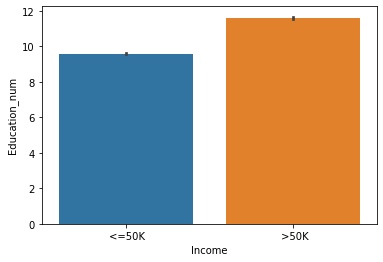

In [19]:
sns.barplot(x = 'Income', y = 'Education_num', data = Census)

If Education num is less than 10 than income is less than 50k, If Education num is more than 11 than income will be more than 50k.

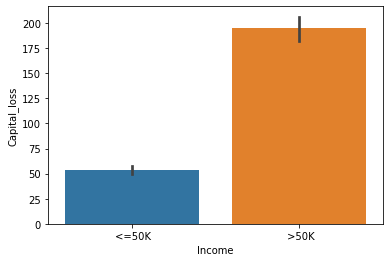

In [20]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = Census)

If Capital Loss is 50, income will be less than 50k and If Capital loss is more than 175, income will be more than 50k

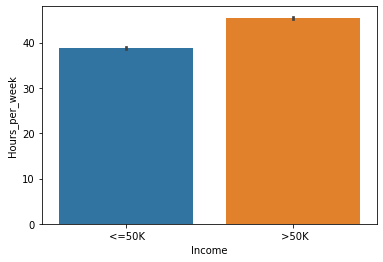

In [21]:
sns.barplot(x = 'Income', y = 'Hours_per_week', data = Census)

If hours per week is less than 40 then Income will be less than 50k, If hours per week is more than 40 then Income will be more than 50k

In [22]:
Census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32559.000000,3.255900e+04,32559.000000,32559.000000,32559.000000,32559.000000
mean,38.581222,1.897788e+05,10.080623,1077.186830,87.309193,40.437483
std,13.640649,1.055500e+05,2.572742,7385.111953,402.972014,12.347807
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178300e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370475e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital_gain and Capital gain have min values 0 and 25,50 and 75% values are Zeros.

There is much difference in values of different columns, so we'll do scaling.

# Label Encoding

In [23]:
label_list=list(Census.select_dtypes(['object']).columns) #Getting the list of object columns in label_list 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #initilizing Label Encoder
for i in label_list:
    Census[i] = le.fit_transform(Census[i]) #Converting Object coulmns to number's using label encoder

In [24]:
Census.head() #checking first 5 rows of data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [25]:
#shuffling the dataset
#This will Shuffle our dataset and it will avoid biasness of prediction
Census = Census.sample(frac=1, random_state = 0)

# Multi-Variate Analysis

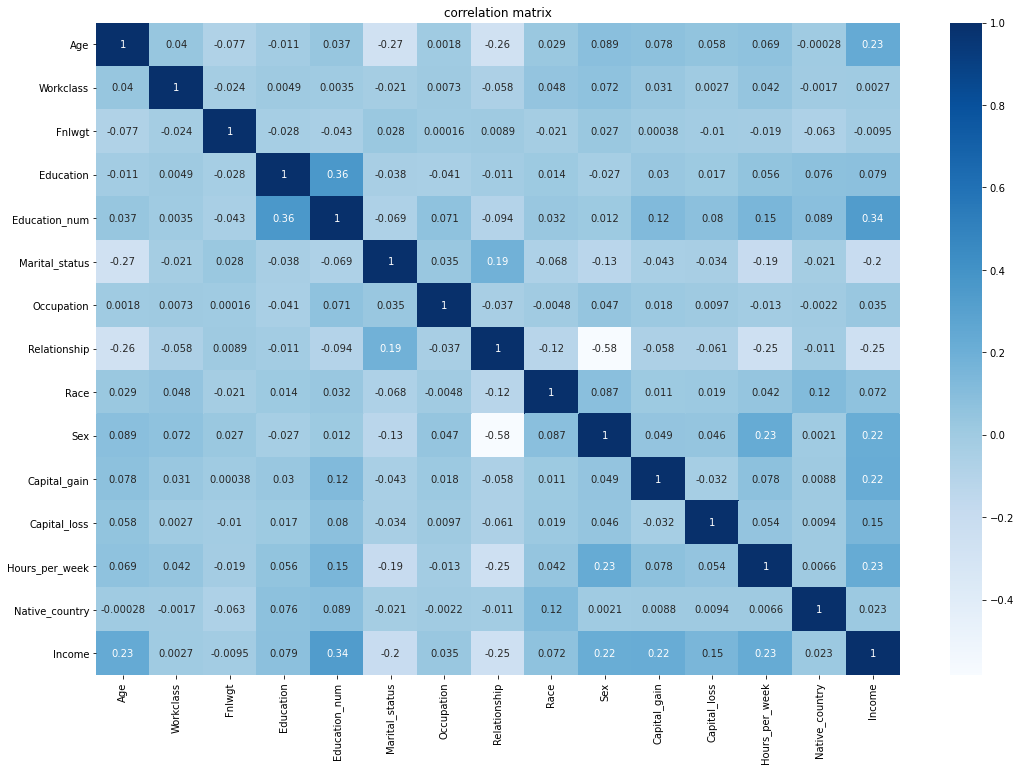

In [26]:
fig=plt.figure(figsize=(18,12))
hc=Census.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
plt.title("correlation matrix")
plt.show()

We can clearly see that there is not much correlation, even though Education_num  have heighst corelation i.e. 34%

# Removing Outliers

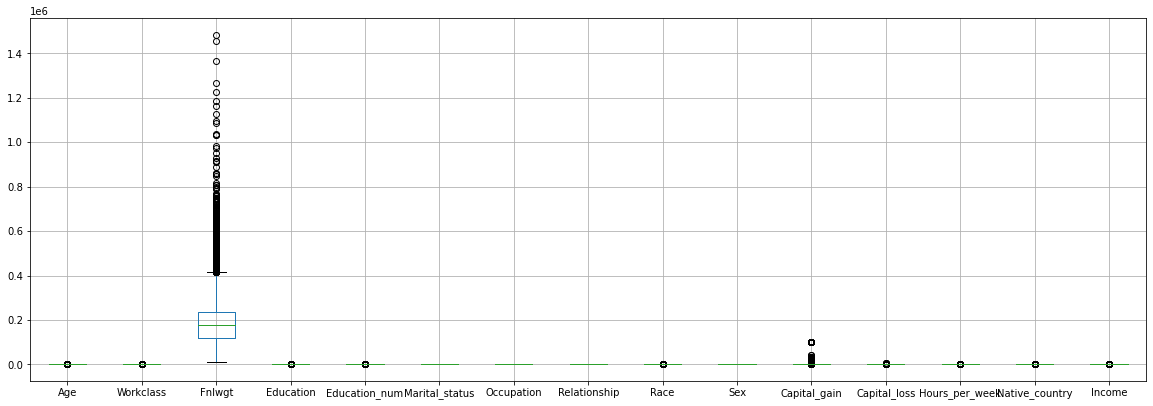

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
Census.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [28]:
#Checking the outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Census))
print(np.where(z>3))

(array([    2,     3,     3, ..., 32538, 32546, 32550], dtype=int64), array([13,  8, 13, ...,  8, 10,  8], dtype=int64))


Many outliers are present in data

In [29]:
#checking the shape of the data
#df=Avacado_new
df=Census[(z<3).all(axis = 1)]
print(Census.shape)
print(df.shape)

(32559, 15)
(27769, 15)


In [30]:
#checking for how much data we lost
loss_percent=(32559-27769)/32559*100
print(loss_percent)

14.7117540465002


More than 14% of data we have to drop but this much amount of data is not good to drop.

So we'll not drop the Outliers.

# Seperating Input and Output Variables

In [31]:
x = Census.drop("Income", axis=1)
y = Census["Income"]

# Removing Skewness

In [32]:
x.skew()

Age                0.558815
Workclass          0.076238
Fnlwgt             1.447069
Education         -0.934033
Education_num     -0.311664
Marital_status    -0.013483
Occupation         0.000478
Relationship       0.786820
Race              -2.435277
Sex               -0.719342
Capital_gain      11.955438
Capital_loss       4.594469
Hours_per_week     0.227629
Native_country    -4.243008
dtype: float64

In [33]:
#In order to reduce Skewness of all the non object columns, we are using PowerTransformation
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer() #initilizing Power Tranformation
for i in int_list:
    if abs(x.loc[:,i].skew())>0.55: #If skewness is more than 55%, we will fix it.
        x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1)) #Fixing the skewness and reshaping it.

Skewness is removed from the data, now need to train the data

# Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
31036,0.413893,0.428571,0.273797,0.733333,0.533333,0.666667,0.000000,0.2,0.50,0.0,0.0,0.0,0.397959,0.95
8950,0.561827,0.428571,0.330642,1.000000,0.600000,0.666667,0.230769,0.8,1.00,0.0,0.0,0.0,0.448980,0.95
7838,0.362900,0.428571,0.345970,0.333333,0.200000,0.833333,0.692308,0.2,1.00,1.0,0.0,0.0,0.397959,0.30
31510,0.326748,0.428571,0.434759,0.666667,1.000000,0.333333,0.692308,0.0,0.25,1.0,0.0,0.0,0.397959,0.05
19139,0.548303,0.428571,0.313780,0.066667,0.400000,0.000000,1.000000,0.2,1.00,1.0,0.0,1.0,0.765306,0.95


# Finding Best Random State 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8252457002457002  on Random_state  186


# Train Test Split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [37]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [38]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8252457002457002
[[7023  478]
 [1229 1038]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7501
           1       0.68      0.46      0.55      2267

    accuracy                           0.83      9768
   macro avg       0.77      0.70      0.72      9768
weighted avg       0.81      0.83      0.81      9768

[0.81388206 0.81357494 0.81679975 0.81925676 0.81677162]
0.8160570261553213
Difference between Accuracy score and cross validation score is -  0.009188674090378934
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||

Random Forest Classifier have the heighst Accuracy and cross validation Score i.e. 85.97%

# Hyper Parameter Tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 15}

In [40]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

In [41]:
accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.8675266175266175

Our model learnt Almost 87%

In [42]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8675266175266175
[[7087  414]
 [ 880 1387]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7501
           1       0.77      0.61      0.68      2267

    accuracy                           0.87      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768



# AUC ROC curve

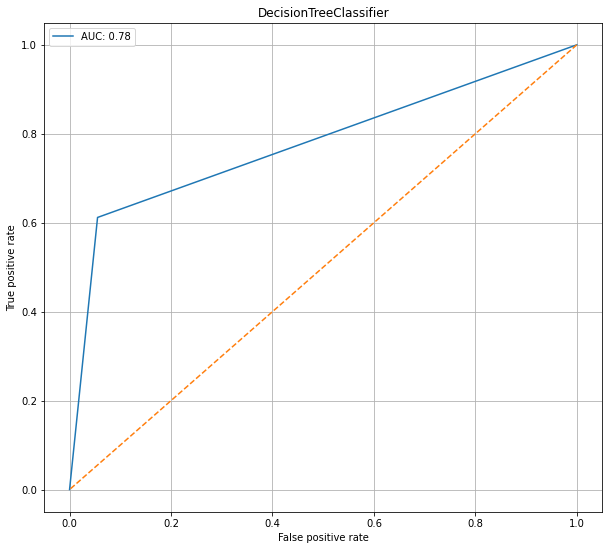

In [43]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Saving the model

In [44]:
import joblib
joblib.dump(clf.best_estimator_,"PJ6_Census.obj")
SVR_from_joblib=joblib.load("PJ6_Census.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 1, 1, ..., 0, 0, 0])

In [45]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  \
Predicted  0  1  1  0  0  0  0  0  0  0   1   0   0   0   0   1   0   0   0   
Original   0  1  1  0  0  0  0  0  0  0   1   0   0   0   0   1   0   0   1   

           19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
Predicted   0   0   0   0   1   1   1   0   0   0   1   0   0   0   0   0   1   
Original    0   0   0   1   1   1   1   0   0   0   0   0   0   0   1   0   1   

           36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
Predicted   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   
Original    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   

           53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  \
Predicted   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
Original    0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   

           70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  \
Predicted   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   
Original    0   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   

           87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  \
Predicted   0   0   0   0   0   0   0   0   1   1   0   0   1    0    0    0   
Original    0   0   0   0   0   0   0   0   1   1   0   0   1    0    0    0   

           103  104  105  106  107  108  109  110  111  112  113  114  115  \
Predicted    1    0    1    0    0    0    0    0    1    0    1    0    0   
Original     1    0    1    0    1    0    0    1    0    0    1    0    0   

           116  117  118  119  120  121  122  123  124  125  126  127  128  \
Predicted    0    0    0    0    0    0    0    0    1    0    1    1    1   
Original     0    1    0    0    0    0    0    1    0    0    1    0    0   

           129  130  131  132  133  134  135  136  137  138  139  140  141  \
Predicted    1    0    0    0    0    0    0    0    1    0    0    0    0   
Original     1    0    0    0    0    0    0    0    1    0    0    0    0   

           142  143  144  145  146  147  148  149  150  151  152  153  154  \
Predicted    0    0    0    0    1    0    1    0    1    0    0    0    0   
Original     0    0    0    0    1    0    1    0    1    1    0    0    1   

           155  156  157  158  159  160  161  162  163  164  165  166  167  \
Predicted    0    0    0    0    0    1    1    0    0    1    0    0    0   
Original     0    0    0    0    0    1    0    0    0    0    0    0    0   

           168  169  170  171  172  173  174  175  176  177  178  179  180  \
Predicted    0    0    0    0    0    0    0    0    0    0    0    0    0   
Original     0    1    0    0    0    0    0    0    0    0    0    0    1   

           181  182  183  184  185  186  187  188  189  190  191  192  193  \
Predicted    0    0    1    0    0    0    0    0    0    1    1    0    0   
Original     0    0    1    0    0    0    0    0    0    0    1    0    0   

           194  195  196  197  198  199  200  201  202  203  204  205  206  \
Predicted    0    1    1    0    0    0    1    0    0    0    0    0    1   
Original     0    1    1    0    0    0    0    1    0    0    1    0    1   

           207  208  209  210  211  212  213  214  215  216  217  218  219  \
Predicted    0    0    0    1    0    0    0    0    0    0    0    0    0   
Original     0    1    0    1    0    1    0    0    0    0    0    1    0   

           220  221  222  223  224  225  226  227  228  229  230  231  232  \
Predicted    0    0    0    1    0    0    1    0    0    0    1    1    0   
Original     0    0    0    0    0    0    1    0    0    0    0    0    0   

           233  234  235  236  237  238  239  240  241  242  243  244  245  \
Predicted    0    0    0    1    0    0    0    0    1    0    0    0    0   
Original     0    0    0    0    0    0    0    0 